# GRIP-THE SPARKS FOUNDATION
Data Science and Business Analytics internship

By:- AAYUSHI GANGULI

Task 1:- Prediction using Supervised ML

In [30]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the data
url="http://bit.ly/w-data"
df=pd.read_csv(url)
# Displaying first 10 records
print(df.head(10))

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
5    1.5      20
6    9.2      88
7    5.5      60
8    8.3      81
9    2.7      25


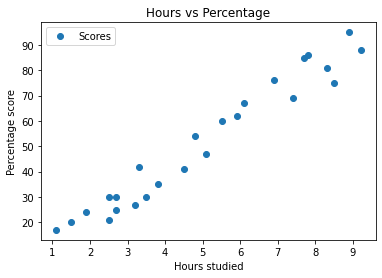

In [31]:
# Plotting the distribution of scores
df.plot(x="Hours",y="Scores",style="o")
plt.title("Hours vs Percentage")
plt.xlabel("Hours studied")
plt.ylabel("Percentage score")
plt.show()

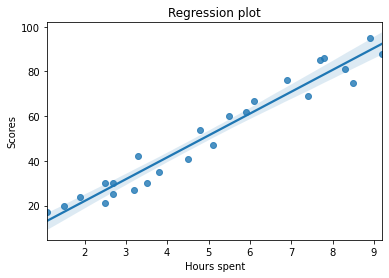

In [32]:
sns.regplot(x="Hours",y="Scores",data=df)
plt.xlabel("Hours spent")
plt.ylabel("Scores")
plt.title("Regression plot")
plt.show()

In [33]:
# Preparing the data
X=df.iloc[ :, :-1].values
y=df.iloc[:,1].values

# Splitting the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

#Training the algorithm
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)
print("Training complete")


Training complete


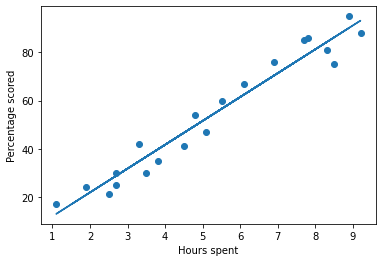

In [34]:
# Plotting the regression line on the training data
line=regressor.coef_*X+regressor.intercept_

#Plotting for the training data
plt.scatter(X_train,y_train)
plt.plot(X,line)
plt.xlabel("Hours spent")
plt.ylabel("Percentage scored")
plt.show()

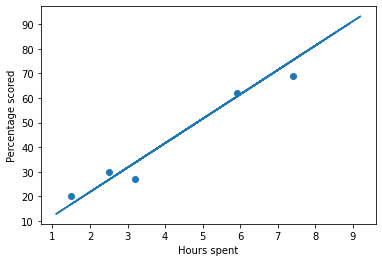

In [35]:
# Plotting the regression line on the test data
line=regressor.coef_*X+regressor.intercept_

#Plotting for the test data
plt.scatter(X_test,y_test)
plt.plot(X,line)
plt.xlabel("Hours spent")
plt.ylabel("Percentage scored")
plt.show()

In [36]:
print(X_test)
y_pred=regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [37]:
# Comparing actual vs predicted data
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
print(df)

   Actual  Predicted
0      20  16.884145
1      27  33.732261
2      69  75.357018
3      30  26.794801
4      62  60.491033


In [38]:
# Finding the model accuracy
from sklearn import metrics
accuracy=metrics.r2_score(y_test,y_pred)
print("Accuracy score of the model: ",accuracy*100,'%')

Accuracy score of the model:  94.54906892105356 %


In [39]:
hours=9.25
own_pred=regressor.predict([[hours]])
print("No. of hours={}".format(hours))
print("Predicted score={}".format(own_pred[0]))

No. of hours=9.25
Predicted score=93.69173248737538


In [40]:
from sklearn import metrics
print("Mean absolute error:",metrics.mean_absolute_error(y_test,y_pred))
print("Mean squared error:",metrics.mean_squared_error(y_test,y_pred))
print("R-squared error:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean absolute error: 4.183859899002975
Mean squared error: 21.5987693072174
R-squared error: 4.6474476121003665
